# Random Forest Pipeline
Was one of the top performing models. 

I will make a pipeline, then gridsearch to see if I can get an even better model by adjusting the parameters.  

In [1]:
#imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import

In [2]:
df = pd.read_csv('../data/1500_sentiment_api.csv')
df.head(2)

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,city,has_neighborhood_overview,has_reviews,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,availability_30,availability_60,availability_90,availability_365,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,transit_scores,property_page_links,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu,25*k
0,177,39.69551,-104.92489,79.0,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,Denver,1,1,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,29,59,89,364,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,37.0,https://www.walkscore.com/score/loc/lat=39.695...,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000,4.0
1,360,39.76758,-105.00316,133.0,entire home,3,3-4,1.0,2.0,2.0,Highland,Denver,1,1,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,0,30,30,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,49.0,https://www.walkscore.com/score/loc/lat=39.767...,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956,6.0


### Creating a model

In [3]:
X = df[[
    'shared_status', 
    'accommodates',
    'bathrooms', 
    'bedrooms',
    'beds_adjusted',
    'neighborhood', 
    'has_neighborhood_overview', 
    'has_reviews',
    'instant_bookable',
    'host_lives_in_neighborhood',
     'host_is_superhost', 
    'host_has_profile_pic',
    'host_identity_verified', 
    'has_host_about', 
    'years_hosting',
    'license_listed', 
    'minimum_nights',
    'maximum_nights',
     'number_of_reviews',
     'bike_scores',
    'walk_scores',
    'transit_scores',
    'host_sent_compound', 
    'description_sent_compound', 
    'neighborhood_sent_compound',
]]
    
    


y = df['price']

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [5]:
numeric_features = list(X.select_dtypes(include = 'number').columns)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = list(X.select_dtypes(include = 'object').columns)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', RandomForestRegressor())])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds_adjusted',
                                                   'has_neighborhood_overview',
                                                   'host_identity_verified',
                                                   'host_has_profile_pic',
                                                   'has_host_about',
                                                   'host_lives_in_neighborhood',
                                                   'license_listed',
                                                   'bike_scores', 'walk_scores',
                                                   'm

In [8]:
y_pred = pipe.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 91.4720922757783


In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['accommodates', 'bathrooms', 'bedrooms',
                                     'beds_adjusted', 'has_neighborhood_overview',
                                     'host_identity_verified',
                                     'host_has_profile_pic', 'has_host_about',
                                     'host_lives_in_neighborhood',
                                     'license_listed', 'bike_scores',
                                     'walk_scores', 'minimum_nights',
                                     'maximum_nights', 'instant_bookable']),
                                   ('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['s

In [10]:
rf_params = {
    'model__n_estimators':[300, 400, 500, 600],
    'model__max_depth': [None, 7, 9, 11, 13],
    'model__min_samples_leaf' : [1,2]
}

In [11]:
gs= GridSearchCV(pipe, param_grid=rf_params, cv=5)

In [12]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds_adjusted',
                                                                          'has_neighborhood_overview',
                                                                          'host_identity_verified',
                                                                          'ho

In [13]:
y_pred = gs.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)

RMSE: 90.66917828947886


# Residuals

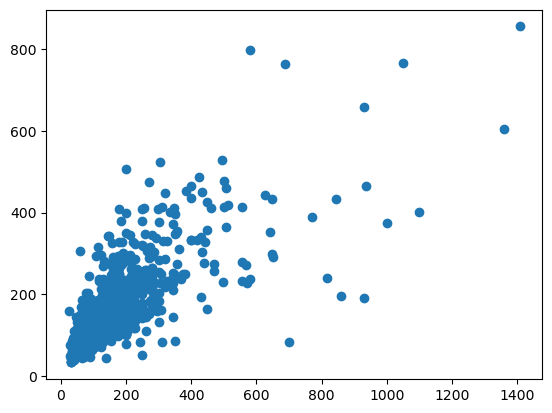

In [20]:
plt.scatter(y_test, y_pred)

In [21]:
resid = np.array(y_test) - np.array(y_pred)

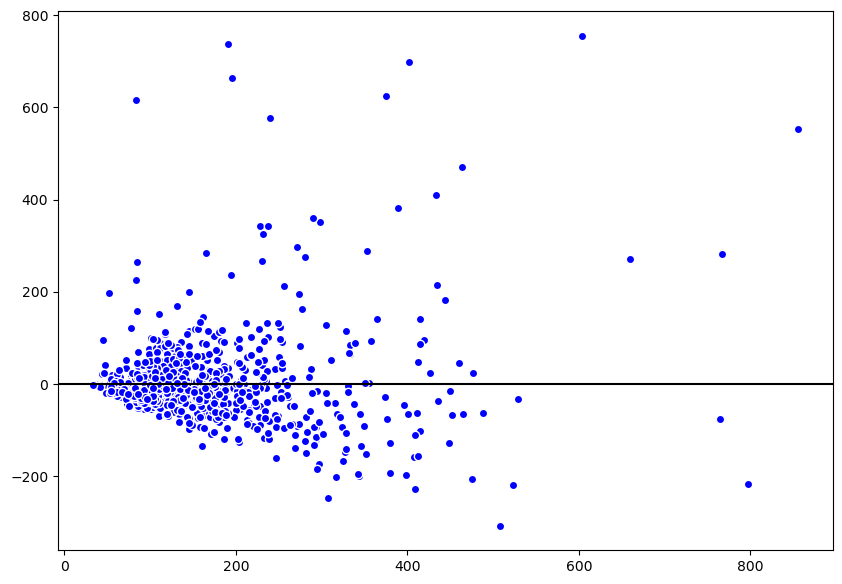

In [23]:
plt.figure(figsize= (10,7))
plt.scatter(y_pred, resid, color = 'blue', edgecolor='white')
plt.axhline(0, color='black')